# Quiz: SQL Query

Kuis ini merupakan bagian dari proses penilaian *Algoritma Academy*. Selamat Anda sudah menyelesaikan materi *SQL Query Course*! Kami akan melakukan penilaian berupa kuis untuk menguji materi yang sudah dipelajari. Pengerjaan Kuis diharapkan dapat dilakukan di dalam kelas, silakan hubungi tim pengajar kami jika Anda melewatkan kesempatan untuk mengambilnya di kelas.

## Skema Database

Pada kuis ini, database yang digunakan adalah `chinook.db` yang terdapat pada folder `data_input`.

Database `chinook.db` terdiri dari 11 tabel yang berisi sampel data dari toko media digital:

- Data terkait media seperti pada tabel `tracks`, `albums`, `artists`, `genres`, `media_types`, `playlists`, `playlist_track` merupakan data asli dari *library Apple iTunes*.
- Informasi mengenai `customers` dan `employees` dibuat menggunakan nama dan alamat fiktif yang dapat ditemukan di *Google Maps*, dan data lain yang diformat dengan baik (telepon, fax, email, dll).
- Informasi penjualan `invoices` dan `invoice_items` dihasilkan secara otomatis menggunakan data acak untuk periode tahun 2009-2013.

In [1]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("data_input/chinook.db")

![](assets/chinookschema2.png)

## Data Invoice Pelanggan

Kita ingin mengembangkan laporan visualisasi penjualan sederhana dari top 5 pasar utama (kolom `Country` di tabel `customers`) yang diurutkan berdasarkan total penjualan (kolom `Total` di tabel`invoices`). 

Kita juga ingin mengidentifikasi top 5 customer berdasarkan namanya (`FirstName`, `LastName`) pada laporan yang dihasilkan.

Terakhir, kita ingin laporan tersebut menyertakan analisis harian (dalam seminggu) tentang kinerja penjualan, dan untuk itu kita akan membutuhkan kolom `InvoiceDate`. 

### SQL Query

Pertama-tama mari kita coba untuk membuat dataframe menggunakan method `read_sql_query()`, anda ingin mengetahui total pembelian yang dilakukan oleh masing-masing pelanggan. Untuk mengetahui nama pelanggan, Anda perlu menggabungkan nama depan (`FirstName`) dan nama belakang (`LastName`) pelanggan dan simpanlah kedalam kolom baru dengan nama `CustomerName`. Buatlah tabel agregasi yang menunjukkan **jumlah** total penjualan (`Total`) pada masing-masing pelanggan dan urutkanlah untuk mendapatkan informasi total pembelian terbesar hingga terkecil.

```
customer_total = pd.read_sql_query(
    '''
    SELECT SUM(___.____) as Total, 
    customers.___ || ' ' || customers.___ AS CustomerName  
    FROM customers
    LEFT JOIN ___
    ON customers.___ = ___.___
    GROUP BY ____
    ORDER BY ___ DESC
    LIMIT ___ 
    ''' ,conn)
```


1. Manakah di antara pelanggan berikut yang termasuk dalam 5 besar pelanggan yang diurutkan berdasarkan total pembeliannya (`Total`)?
    - [ ] Victor Stevens
    - [x] Hugh O'Reilly
    - [ ] Puja Srivastava
    - [ ] Astrid Gruber

In [16]:
## Your code here
query = """ 
        SELECT SUM(inv.Total) as Total,
            cs.FirstName||' '||cs.LastName as CustomerName
        FROM customers as cs
        LEFT JOIN invoices as inv
            ON cs.CustomerId = inv.CustomerId
        GROUP BY CustomerName
        ORDER BY Total DESC
        LIMIT 5
"""

In [17]:
pd.read_sql_query(query,conn,index_col='CustomerName')

,Total
CustomerName,
Helena Holý,49.62
Richard Cunningham,47.62
Luis Rojas,46.62
Ladislav Kovács,45.62
Hugh O'Reilly,45.62


Anda ingin mengetahui pendapatan bruto yang diperoleh oleh masing-masing negara. Lakukanlah fecthing data dari database untuk mendapatkan **jumlah** dari pendapatan bruto (`Total`) yang diperoleh oleh masing-masing negara dan urutkanlah agar mendapatkan informasi negara yang memiliki pendapatan paling besar hingga paling kecil.

```
country_total = pd.read_sql_query(
    '''
    SELECT SUM(____.____) as Total, customers._____  
    FROM customers
    LEFT JOIN _____
    ON customers.____ = ____.____
    GROUP BY ____
    ORDER BY ____ DESC
    ''' ,conn)
```

2. Manakah di antara negara berikut yang termasuk dalam 5 negara dengan pendapatan bruto paling besar yang diurutkan berdasarkan kolom `Total`?
    - [ ] United Kingdom
    - [x] Germany
    - [ ] Portugal
    - [ ] India

In [15]:
## Your code here
query = """ 
    SELECT SUM(inv.Total) as Total, cs.country as Country
    FROM customers as cs
    LEFT JOIN invoices as inv
    ON cs.CustomerId = inv.CustomerId
    GROUP BY Country
    ORDER BY Total DESC       
"""
pd.read_sql_query(query,conn,index_col='Country')

,Total
Country,
USA,523.06
Canada,303.96
France,195.10
Brazil,190.10
Germany,156.48
United Kingdom,112.86
Czech Republic,90.24
Portugal,77.24
India,75.26


## Top 5 Negara 

Berdasarkan informasi yang sudah Anda dapatkan mengenai 5 negara dengan pendapatan tertinggi, Anda ingin melakukan analisa lebih lanjut beberapa informasi lain yang bisa dijadikan sebagai *insight*. Gunakan kerangka kode di bawah ini sebagai referensi untuk membuat sebuah dataframe yang berisi catatan pelanggan-pelanggan yang berasal dari 5 negara dengan total pendapatan teratas. 

```
top5data = pd.read_sql_query(
    '''
    SELECT ___.Total, ___.InvoiceDate, customers.country, 
    customers.____ || ' ' || customers.____ as CustomerName
    FROM customers
    LEFT JOIN ____
    ON customers.____ = ____.____
    WHERE ____.____ IN ('___' , '___', '___', '___','___')
    ''' ,conn,parse_dates='InvoiceDate')
```

> **Petunjuk** : Pada method `read_sql_query`, Anda dapat menggunakan argumen `parse_dates='InvoiceDate'` agar kolom tertentu dikonversikan sebagai tanggal, sehingga Anda tidak perlu lagi melakukan konversi `to_datetime ()`

In [27]:
## Your code here
query=""" 
    SELECT inv.Total, inv.InvoiceDate, cs.country, 
    cs.FirstName || ' ' || cs.LastName as CustomerName
    FROM customers as cs
    LEFT JOIN invoices as inv
    ON cs.CustomerId = inv.CustomerId
    WHERE cs.country IN ('USA' , 'Canada', 'France', 'Brazil','Germany')
"""
top5data = pd.read_sql_query(query,conn,parse_dates='InvoiceDate')
top5data.shape

(245, 4)

In [28]:
top5data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Total         245 non-null    float64       
 1   InvoiceDate   245 non-null    datetime64[ns]
 2   Country       245 non-null    object        
 3   CustomerName  245 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 7.8+ KB


In [29]:
top5data['Country']=top5data['Country'].astype('category')
top5data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Total         245 non-null    float64       
 1   InvoiceDate   245 non-null    datetime64[ns]
 2   Country       245 non-null    category      
 3   CustomerName  245 non-null    object        
dtypes: category(1), datetime64[ns](1), float64(1), object(1)
memory usage: 6.3+ KB


Menggunakan dataframe `top5data` diatas, lakukan analisa deskriptif untuk menjawab pertanyaan dibawah ini.

3. Berapa banyak transaksi penjualan (baris) yang berasal dari 5 negara teratas?
    - [ ] 7
    - [x] 245
    - [ ] 412
    - [ ] 1715

In [30]:
## Your code here
top5data.shape


(245, 4)

### Menggabungkan SQL Query dengan Manipulasi Data Pandas

Dengan menggunakan Pandas, kita dapat melakukan teknik-teknik data manipulasi seperti ekstraksi informasi dari tipe data datetime pada dataframe hasil fechting dari database. Contohnya, anda tertarik untuk mengetahui lebih lanjut penjualan yang dilakuan pada top 5 negara khususnya Perancis (**France**). Negara Perancis (**France**) melakukan penjualan setiap harinya, lakukan agregasi data untuk mendapatkan **jumlah** pendapatan masing-masing harinya.

Kita dapat menggunakan kolom `InvoiceDate` dari dataframe `top5data` untuk membuat kolom baru `InvoiceDOW` untuk menampilkan nama-nama hari pada suatu transaksi

> **Petunjuk** : `pandas` memiliki method bawaan untuk mengekstrak nama hari dalam seminggu. Kita telah mempelajarinya di materi ke-2 dari spesialisasi ini (**Working with Datetime**). Contoh penggunaannya adalah:
>
> `data['InvoiceDOW'] = data['InvoiceDate'].dt.day_name()`


In [33]:
## Your code here
top5data['InvoiceDOW']= top5data['InvoiceDate'].dt.day_name()
top5data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Total         245 non-null    float64       
 1   InvoiceDate   245 non-null    datetime64[ns]
 2   Country       245 non-null    category      
 3   CustomerName  245 non-null    object        
 4   InvoiceDOW    245 non-null    object        
dtypes: category(1), datetime64[ns](1), float64(1), object(2)
memory usage: 8.2+ KB


In [34]:
top5data.head()

,Total,InvoiceDate,Country,CustomerName,InvoiceDOW
0,3.98,2010-03-11,Brazil,Luís Gonçalves,Thursday
1,3.96,2010-06-13,Brazil,Luís Gonçalves,Sunday
2,5.94,2010-09-15,Brazil,Luís Gonçalves,Wednesday
3,0.99,2011-05-06,Brazil,Luís Gonçalves,Friday
4,1.98,2012-10-27,Brazil,Luís Gonçalves,Saturday


Selain Perancis, Anda juga tertarik untuk menganalisa pendapatan harian yang diperoleh dari top 5 negara dengan pendapatan tertinggi. Menggunakan dataframe `top5data`, lakukanlah agregasi untuk mengetahui **jumlah** penjualan masing-masing hari dari keseluruhan negara tersebut.


4. Berdasarkan agregasi data yang Anda lakukan diatas, jawablah 2 pertanyaan berikut: Berapa jumlah penjualan (`Total`) yang kita hasilkan dari total(`sum`) pasar Perancis (**France**) pada hari Selasa? Berapa total penjualan yang kita hasilkan dari semua gabungan 5 pasar teratas pada hari Jumat?
    - [ ] 160.41 / 173.31  
    - [ ] 160.41 / 326.77
    - [x] 1.98 / 173.31
    - [ ] 1.98 / 326.77

In [35]:
## Your code here
top5data[(top5data['Country']=='France')&(top5data['InvoiceDOW']=='Tuesday')] 

,Total,InvoiceDate,Country,CustomerName,InvoiceDOW
214,1.98,2012-11-27,France,Camille Bernard,Tuesday


In [36]:
top5data[top5data['InvoiceDOW']=='Friday']

,Total,InvoiceDate,Country,CustomerName,InvoiceDOW
3,0.99,2011-05-06,Brazil,Luís Gonçalves,Friday
5,13.86,2012-12-07,Brazil,Luís Gonçalves,Friday
13,0.99,2012-07-13,Germany,Leonie Köhler,Friday
20,0.99,2013-09-20,Canada,François Tremblay,Friday
42,1.98,2009-06-05,Brazil,Fernanda Ramos,Friday
50,1.98,2010-08-13,Canada,Mark Philips,Friday
56,1.98,2009-06-05,Canada,Jennifer Peterson,Friday
59,1.98,2011-10-21,Canada,Jennifer Peterson,Friday
64,1.98,2010-08-13,USA,Frank Harris,Friday
67,1.98,2012-12-28,USA,Frank Harris,Friday


In [37]:
top5data[top5data['InvoiceDOW']=='Friday']['Total'].sum()

173.31

In [40]:
pd.pivot_table(top5data,
            values='Total',
            index='Country',
            columns='InvoiceDOW',
            aggfunc='sum',
            margins=True,       
)

InvoiceDOW,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,All
Country,,,,,,,,
Brazil,16.83,19.80,63.36,15.84,45.56,1.98,26.73,190.10
Canada,58.41,43.56,23.76,21.78,43.58,22.78,90.09,303.96
France,1.98,25.75,87.15,18.84,47.52,1.98,11.88,195.10
Germany,8.91,64.35,38.67,5.94,3.96,9.90,24.75,156.48
USA,87.18,19.80,23.76,149.66,77.27,123.77,41.62,523.06
All,173.31,173.26,236.70,212.06,217.89,160.41,195.07,1368.70


In [41]:
harian = pd.pivot_table(top5data,
            values='Total',
            index='Country',
            columns='InvoiceDOW',
            aggfunc='sum',      
)
harian.head()

InvoiceDOW,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Country,,,,,,,
Brazil,16.83,19.80,63.36,15.84,45.56,1.98,26.73
Canada,58.41,43.56,23.76,21.78,43.58,22.78,90.09
France,1.98,25.75,87.15,18.84,47.52,1.98,11.88
Germany,8.91,64.35,38.67,5.94,3.96,9.90,24.75
USA,87.18,19.80,23.76,149.66,77.27,123.77,41.62


Hasil analisa jumlah pendapatan harian masing-masing negara diatas akan dibuat sebuah visualisasi sebagai bahan untuk reporting Anda. Simpanlah agregasi data tersebut kedalam sebuah variabel. Apabila Anda menggunakan parameter `margin` dalam membuat agregasi data, hapuslah terlebih dahulu agar memudahkan visualisasi. Buatlah visualisasi dengan metode `.plot()` dengan mengatur parameter `kind` untuk membuat salah satu jenis plot berikut:` line`, `bar`,` scatter` & `box`.

5. Berdasarkan analisa diatas, manakah jenis plot yang **PALING TIDAK SESUAI** digunakan?
    - [ ] `line`
    - [ ] `bar`
    - [x] `scatter`
    - [ ] `box`

In [ ]:
import matplotlib as plt

<Axes: xlabel='Country'>

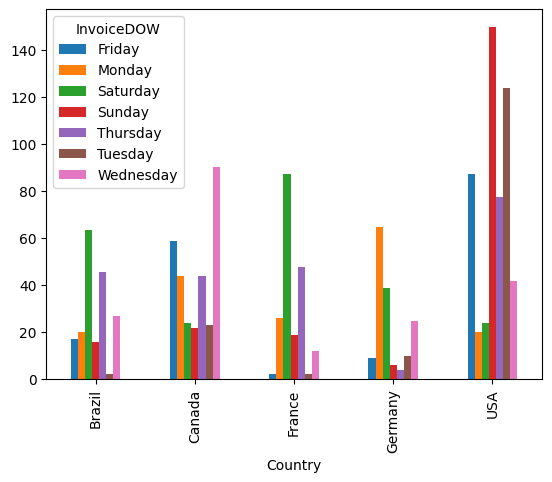

In [43]:
## Your code here
harian.plot(kind='bar')

<Axes: xlabel='Country'>

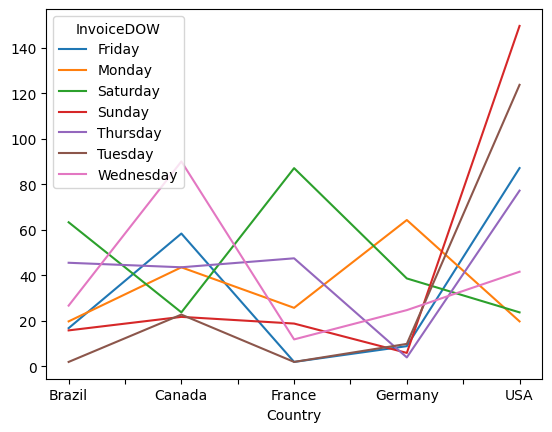

In [44]:
harian.plot(kind='line')

<Axes: >

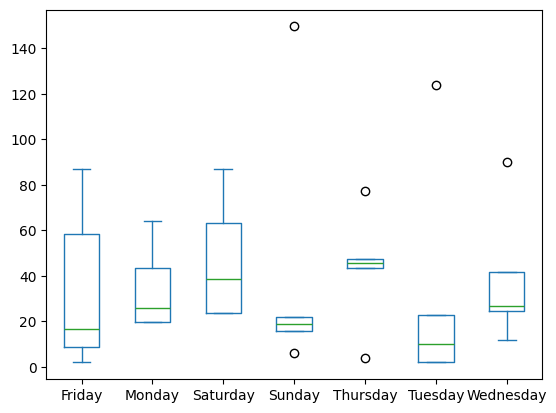

In [46]:
harian.plot(kind='box')

In [47]:
harian.plot(kind='scatter')

ValueError: scatter requires an x and y column

Misalkan kita ingin membandingkan genre musik terlaris di 5 negara teratas. Mari kita coba dengan mengisi terlebih dahulu kode yang rumpang (______) di bawah ini:
```
genre = pd.read_sql_query(
    '''
    SELECT 
    BillingCountry AS Country, ______.Name AS Genre 
    FROM ______ 
    LEFT JOIN invoice_items ON invoices.______ = invoice_items.______
    LEFT JOIN tracks ON invoice_items.______ = ______.______ 
    LEFT JOIN ______ ON tracks.______ = genres.______
    WHERE BillingCountry IN ('USA', 'Canada', 'France', 'Brazil', 'Germany')
    ''',conn)
```


In [51]:
## Your code here
query =""" 
SELECT 
    BillingCountry AS Country, genres.Name AS Genre 
    FROM invoices 
    LEFT JOIN invoice_items 
        ON invoices.InvoiceId = invoice_items.InvoiceId
    LEFT JOIN tracks 
        ON invoice_items.TrackId = tracks.TrackId 
    LEFT JOIN genres 
        ON tracks.GenreId = genres.GenreId
    WHERE BillingCountry IN ('USA', 'Canada', 'France', 'Brazil', 'Germany')
"""

genre = pd.read_sql_query(query,conn)
genre.head()

,Country,Genre
0,Germany,Rock
1,Germany,Rock
2,Canada,Rock
3,Canada,Rock
4,Canada,Rock


Setelah Anda menyelesaikan query untuk dataframe `genre` di atas, salin dan jalankan kode di bawah ini untuk membuat diagram batang yang membandingkan genre lagu terlaris per negara.
```
genre.\
groupby(['Country','Genre']).size().reset_index(name = 'Total Bought').\
sort_values(['Country','Total Bought'], ascending=False).\
groupby('Country').head(5).\
pivot(index = 'Country', columns = 'Genre').plot(kind='bar',stacked=True).\
legend(bbox_to_anchor=(1, 1), loc=2) 
```
6. Genre apa yang **TIDAK** termasuk dalam genre terlaris di Jerman (Germany)?
   - [ ] Blues
   - [x] Jazz
   - [ ] Alternative & Punk
   - [ ] Latin

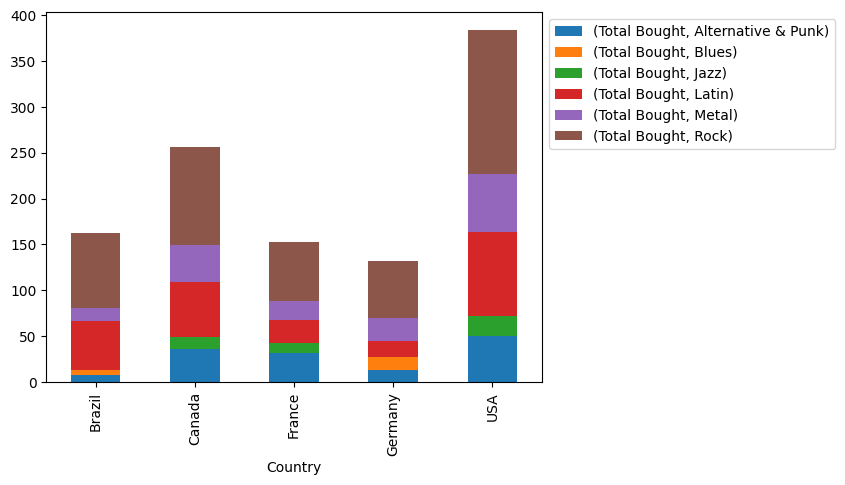

In [52]:
## Your code here
genre.\
groupby(['Country','Genre']).size().reset_index(name = 'Total Bought').\
sort_values(['Country','Total Bought'], ascending=False).\
groupby('Country').head(5).\
pivot(index = 'Country', columns = 'Genre').plot(kind='bar',stacked=True).\
legend(bbox_to_anchor=(1, 1), loc=2) 